## O. Importy a načítanie datasetu


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [24]:
#Import datasetu
dataset = pd.read_csv('Churn_Modelling.csv', index_col='RowNumber')
dataset.head()
data_train2 = dataset.drop(['CustomerId','Surname'],axis=1)

## 1. Príprava dát

In [25]:
# rozdelenie datasetu na dáta a hodnoty True/False (0,1), ktoré odkazujú na to 
# či zákazník opustil banku alebo nie.
X_col = dataset.columns.tolist()[2:12]
y_col = dataset.columns.tolist()[-1:]
print('Dáta', X_col)
print('True/False', y_col)

Dáta ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
True/False ['Exited']


In [26]:
# vytvorenie nummpy array z týchto stĺpcov
X = dataset[X_col].values 
y = dataset[y_col].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

Ako môžeme vidieť tak dáta obsahujú aj kategorické premenné, ktoré treba nahradiť.

In [27]:
encoder = LabelEncoder()
X[:,1] = encoder.fit_transform(X[:,1]) # zmena krajiny na hodnoty vhodné pre analýzu (0-France,1-Germany,2-France)
print('Krajina: ')
print(X[:,1])
X[:,2] = encoder.fit_transform(X[:,2]) # zmena pohlavia na hodnoty vhodné pre analýzu (0-Female, 1-Male)
print('Pohlavie: ')
print(X[:,2])

Krajina: 
[0 2 0 ... 0 1 0]
Pohlavie: 
[0 0 0 ... 0 1 0]


In [28]:
pipeline = Pipeline(
    [('Categorizer', ColumnTransformer(
         [
          ("Gender", OneHotEncoder(categories='auto', drop='first'), [2]),
           
          ("Geography", OneHotEncoder(categories='auto', drop='first'), [1])
         ], remainder='passthrough', n_jobs=1)),
     # Standard Scaler for the classifier
    ('Normalizer', StandardScaler())
    ])

In [29]:
X = pipeline.fit_transform(X)

In [30]:
# Rozdelenie datasetu na testovacie a trénovacie dáta v pomere 30:70!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0) 

In [31]:
print(f'trai: {X_train.shape}, {y_train.shape}')
print(f'test: {X_test.shape}, {y_test.shape}')

trai: (7000, 11), (7000, 1)
test: (3000, 11), (3000, 1)


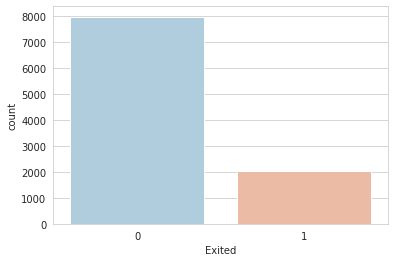

In [34]:
data2 = dataset.drop(['CustomerId','Surname'],axis=1)
sns.set_style('whitegrid')
sns.countplot(x='Exited',data=data2,palette='RdBu_r')
# je vidieť, že dáta nie sú veľmi vyvážené.

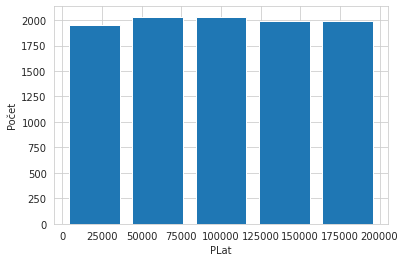

In [36]:
plt.hist(data2.EstimatedSalary, bins=5
         , rwidth=0.8)
plt.xlabel('PLat')
plt.ylabel('Počet')
plt.show()

##2. Vytvorenie NS